In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
Y = pd.Series(data.target)

In [4]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


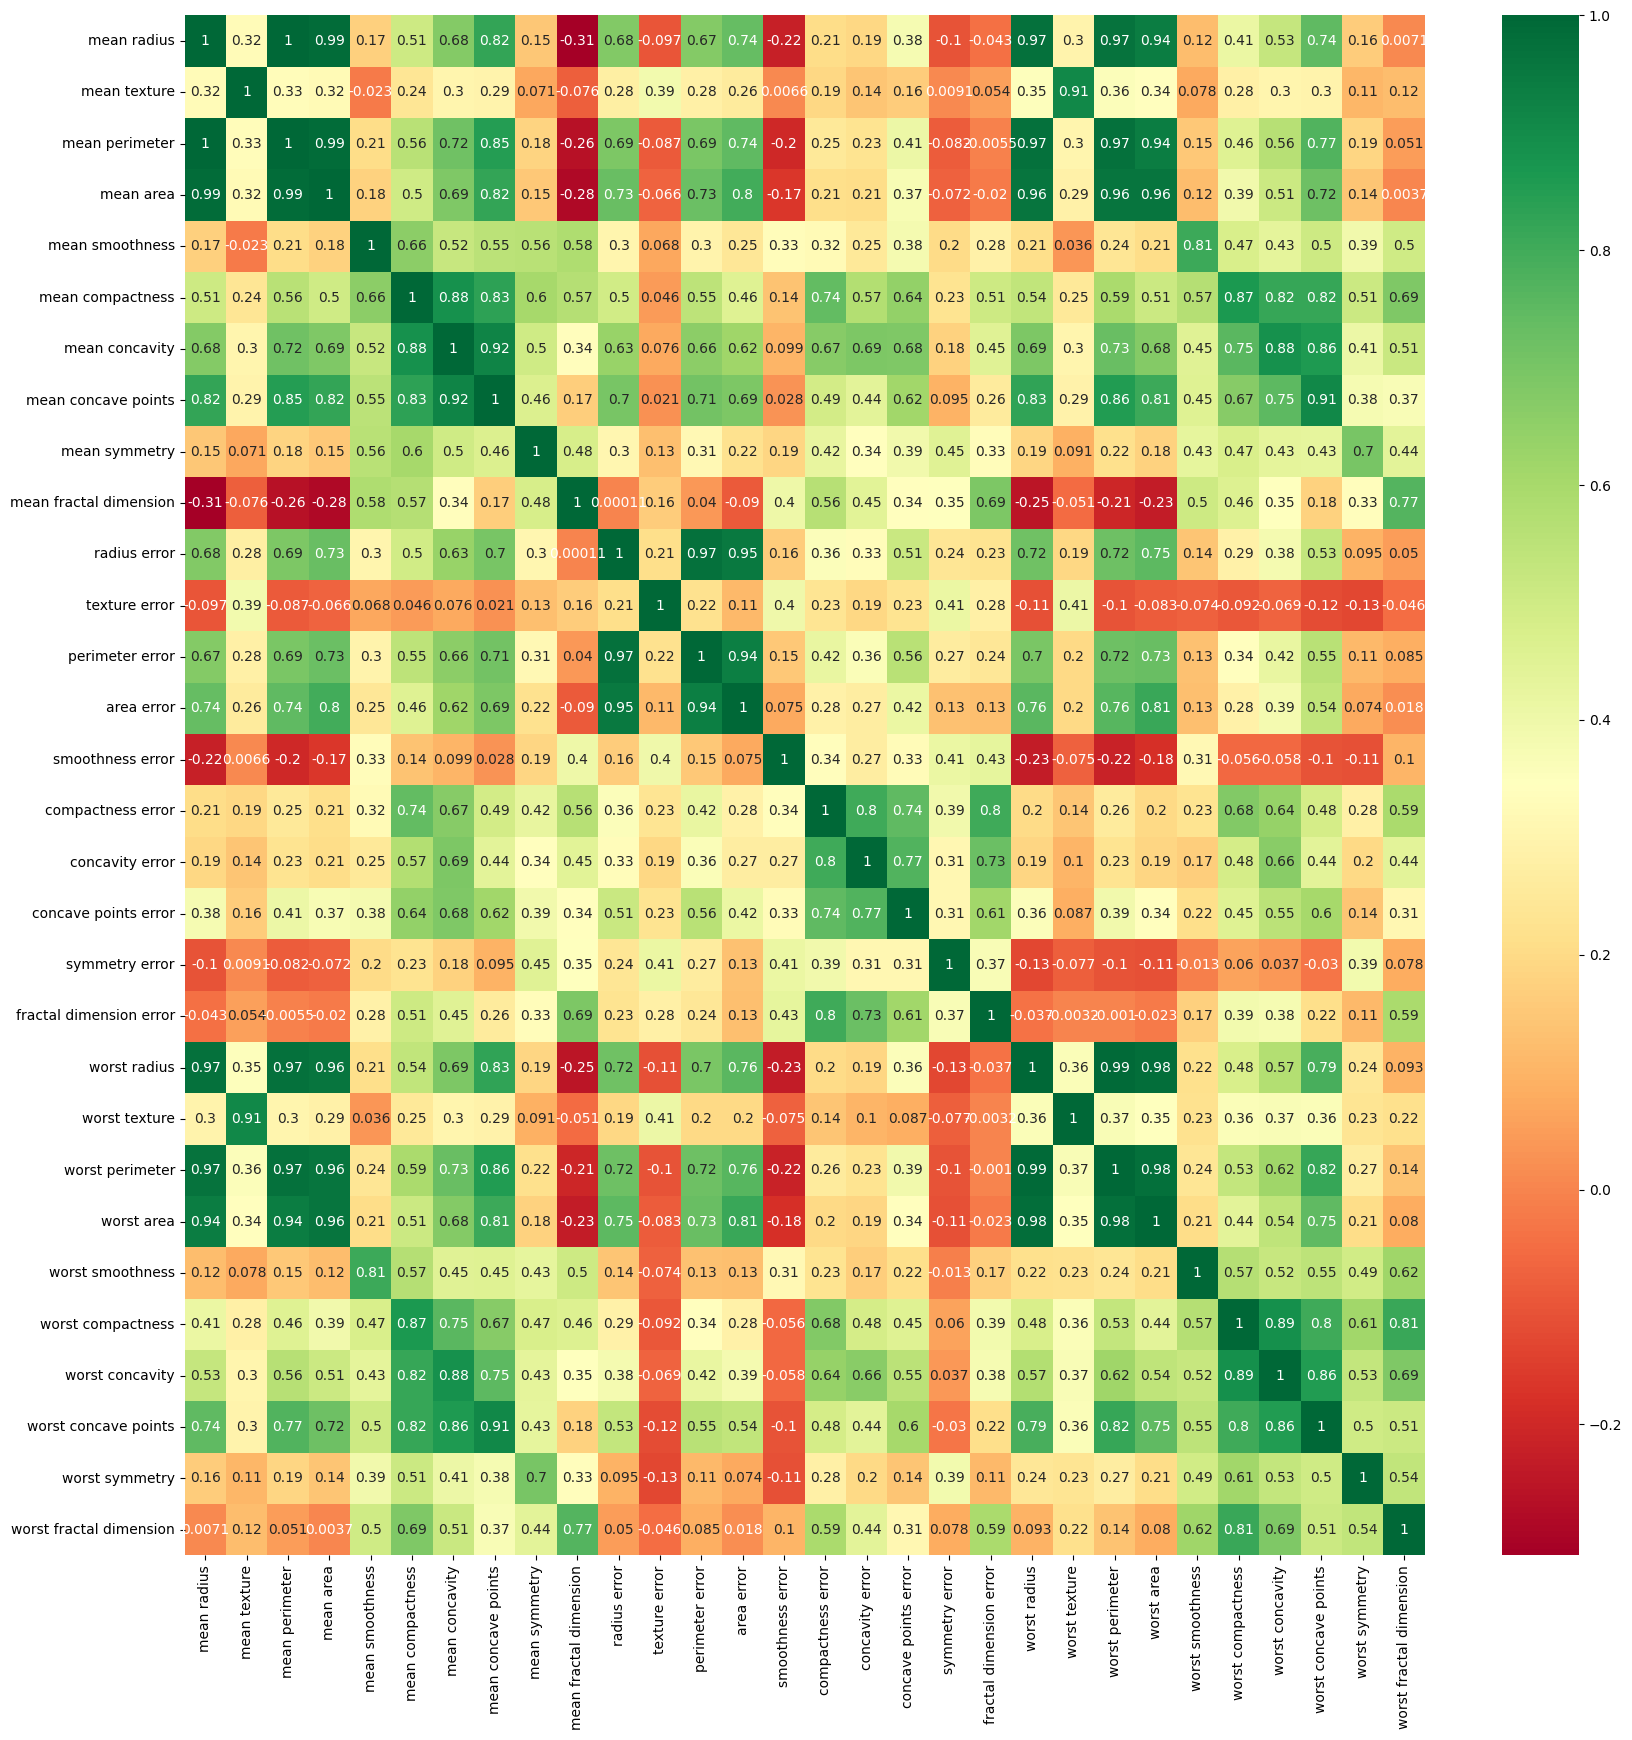

In [5]:
# Correlation matrix
plt.figure(figsize=(20,20))
corrmat = X.corr()
sns.heatmap(corrmat, annot=True, cmap="RdYlGn")
plt.show()

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [7]:
# Define the hyperparameters to tune
params = {
    "n_estimators": [100, 200, 300, 400, 500],
    "max_features": ['auto', 'sqrt', 'log2'],
    "max_depth": [None, 10, 20, 30, 40, 50],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

In [8]:
# Define a timer function
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    else:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print(f'\n Time taken: {int(thour)} hours {int(tmin)} minutes and {round(tsec, 2)} seconds.')

In [9]:
# Initialize the Random Forest classifier
classifier = RandomForestClassifier()

In [10]:
# Perform hyperparameter optimization using RandomizedSearchCV
random_search = RandomizedSearchCV(classifier, param_distributions=params, n_iter=100, scoring='roc_auc', n_jobs=-1, cv=5, verbose=3)

In [11]:
# Start timing and fit the model
start_time = timer()
random_search.fit(X_train, Y_train)
timer(start_time)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=

/Users/prajwal/Developer/Prep/venv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
195 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/prajwal/Developer/Prep/venv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/prajwal/Developer/Prep/venv/lib/python3.8/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Users/prajwal/Developer/Prep/venv/lib/python3.8/site-packages/sklearn/base.py", line 638, in _validate_params
    v


 Time taken: 0 hours 0 minutes and 56.3 seconds.


In [12]:
# Display the best parameters and best estimator
print("Best Estimator:\n", random_search.best_estimator_)
print("Best Parameters:\n", random_search.best_params_)

Best Estimator:
 RandomForestClassifier(max_depth=30, n_estimators=500)
Best Parameters:
 {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}


In [13]:
# Train the classifier with the best parameters
best_params = random_search.best_params_
classifier = RandomForestClassifier(**best_params)
classifier.fit(X_train, Y_train)

RandomForestClassifier(max_depth=30, n_estimators=500)

In [14]:
# Predict on the test set
Y_pred = classifier.predict(X_test)

In [15]:
# Evaluate the classifier
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)

In [16]:
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9649122807017544
Confusion Matrix:
 [[40  3]
 [ 1 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



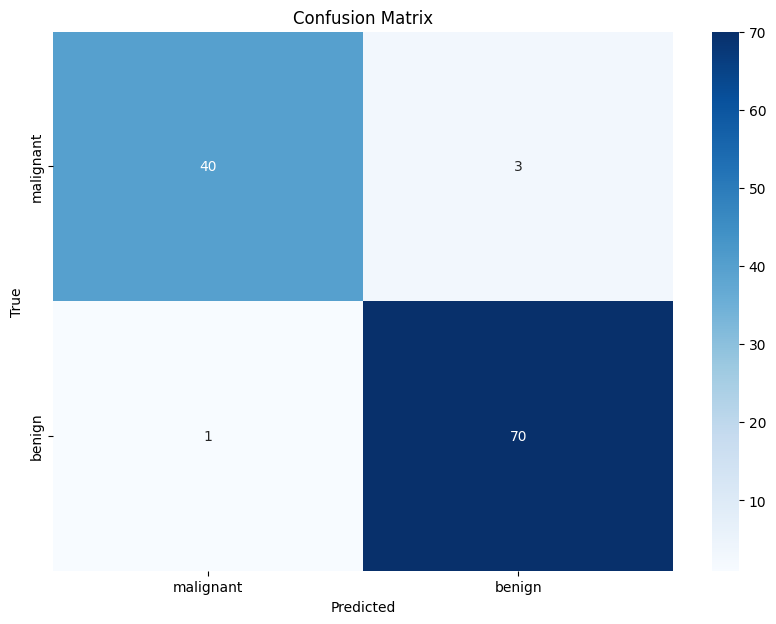

In [17]:
# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [18]:
# Evaluate the classifier using cross-validation
scores = cross_val_score(classifier, X, Y, cv=10)
print("Cross-Validation Scores:", scores)
print("Mean Cross-Validation Score:", scores.mean())

Cross-Validation Scores: [0.98245614 0.9122807  0.94736842 0.96491228 1.         0.98245614
 0.94736842 0.98245614 0.94736842 1.        ]
Mean Cross-Validation Score: 0.9666666666666666
